## Test results for consistency

In [5]:
import os
import yaml
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the .yml files
directory = 'tuneout'

# Dictionary to store parameter values
parameter_values = {}

# Read all .yml files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.yml'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            data = yaml.safe_load(file)
            for group in data['tuning']:
                for param, value in data['tuning'][group].items():
                    if param not in parameter_values:
                        parameter_values[param] = []
                    parameter_values[param].append(value)


In [7]:

# Read reference parameters from config-tuner.yaml
with open('config-tuner.yaml', 'r') as file:
    config = yaml.safe_load(file)
    reference_parameters = config['reference_parameters']


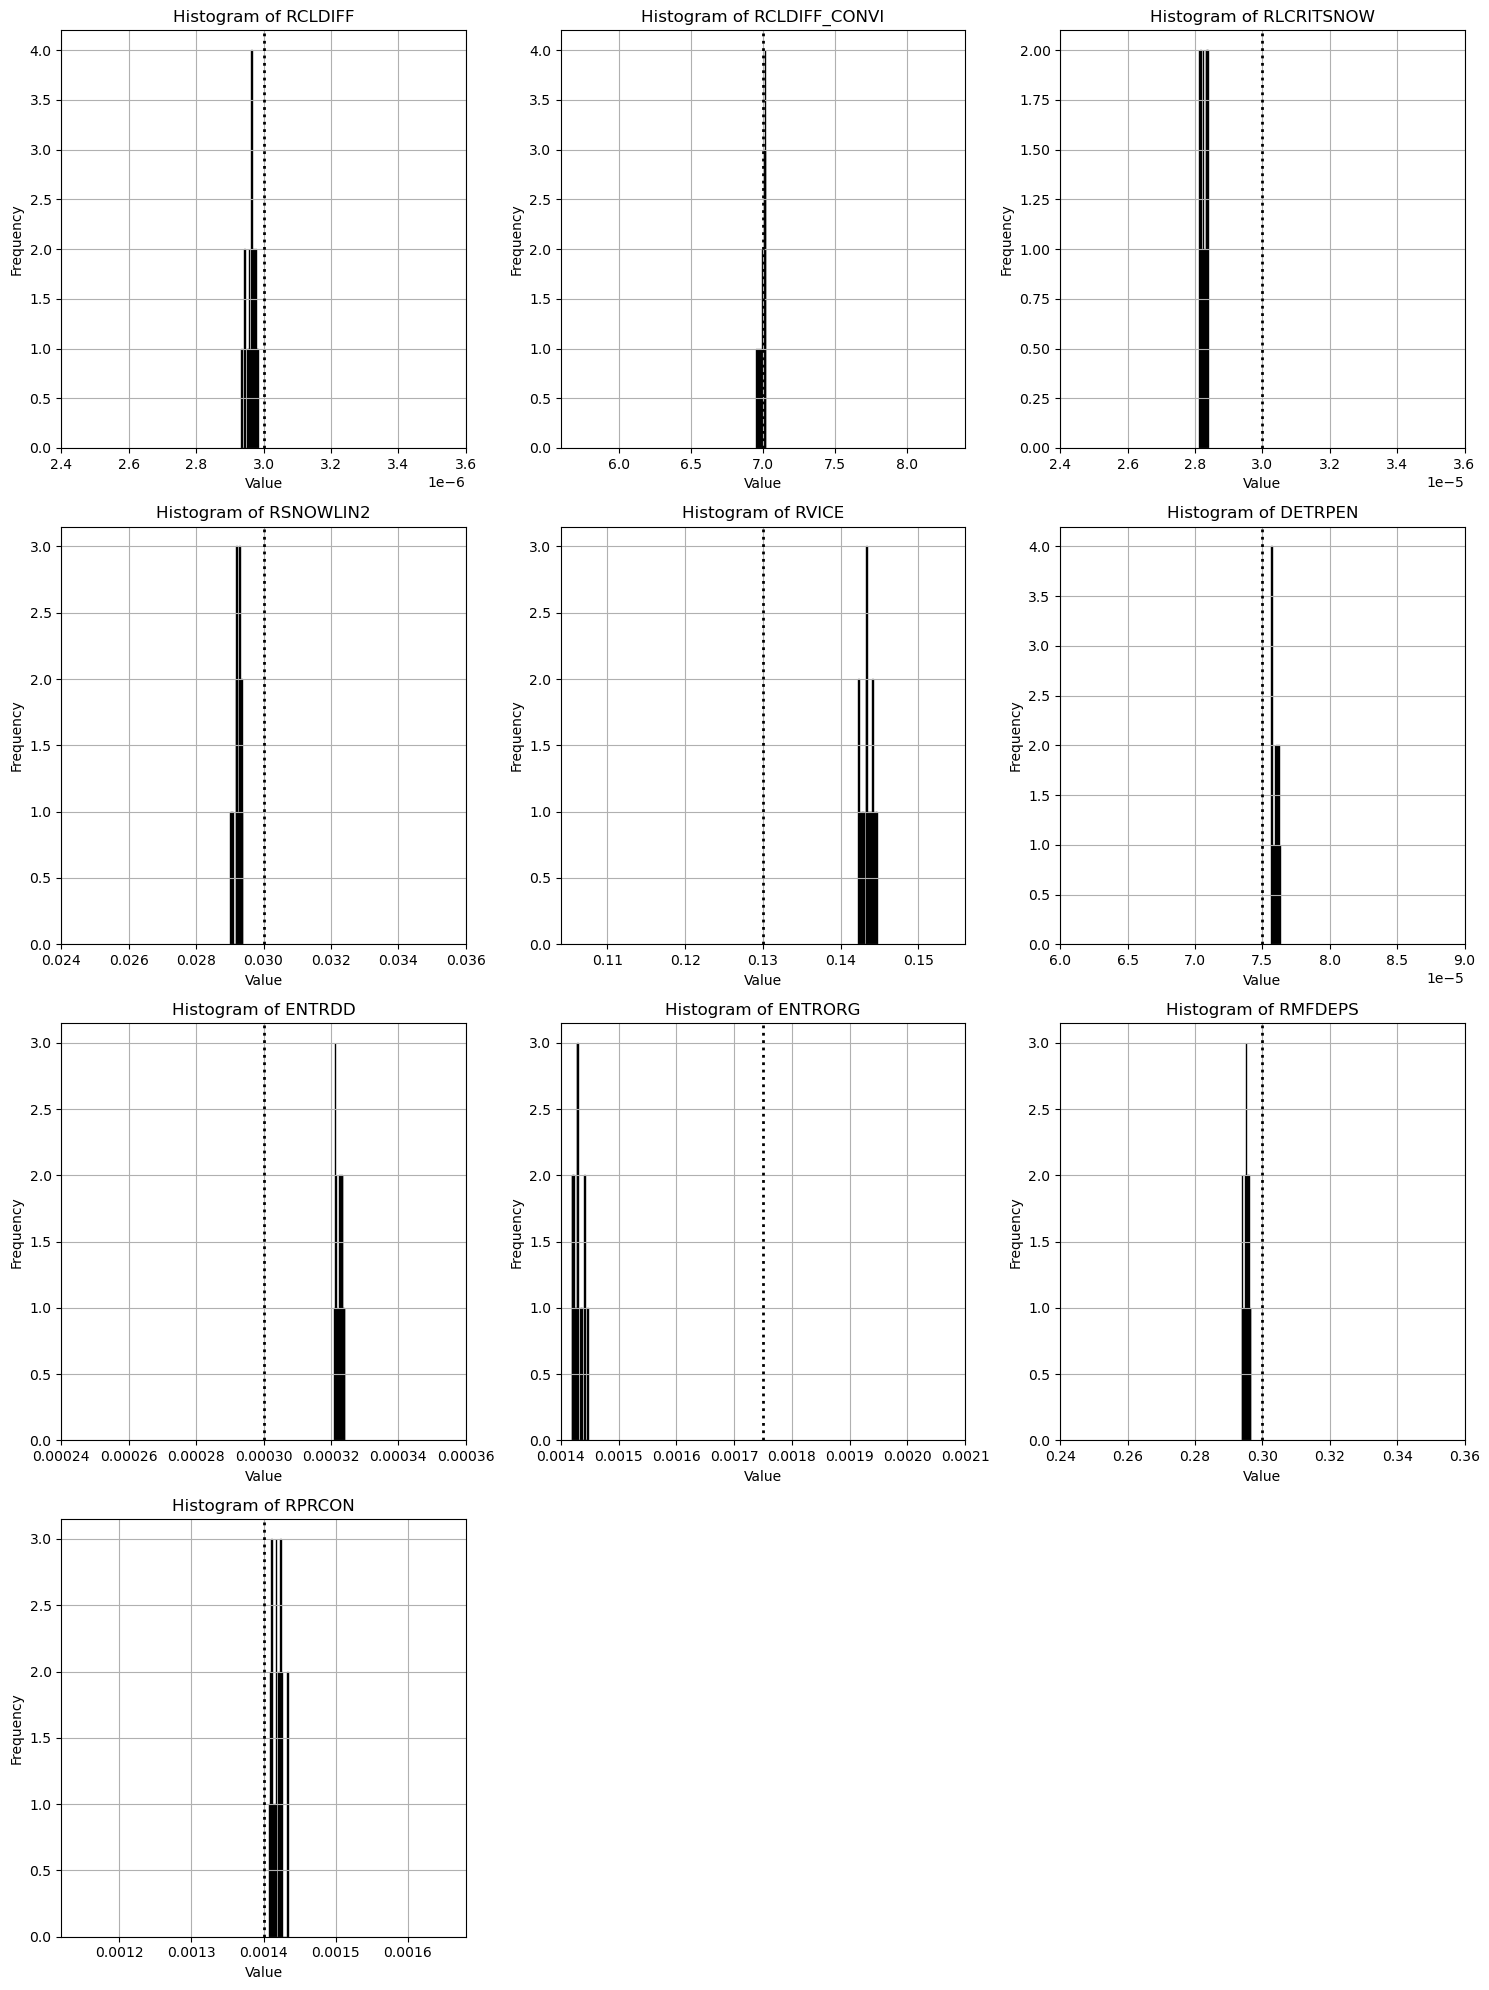

In [8]:
# Number of parameters
num_params = len(parameter_values)

# Determine the number of rows and columns for the subplots
num_cols = 3
num_rows = int(np.ceil(num_params / num_cols))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Plot histograms for each parameter
for i, (param, values) in enumerate(parameter_values.items()):
    ref_value = reference_parameters[param]
    lower_bound = ref_value * 0.8
    upper_bound = ref_value * 1.2
    
    axes[i].hist(values, bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram of {param}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)
    axes[i].set_xlim(lower_bound, upper_bound)
    axes[i].axvline(ref_value, color='black', linestyle='dotted', linewidth=2)  # Plot the reference value

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.savefig('parameter_histograms.png')  # Save the figure as a PNG file
plt.show()